# TCAV scores across all tested concepts
Notebook to collect all teste concepts and visualize TCAV scores on each layer with a boxplot. 

In [121]:
import sys 
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [122]:
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_pos_plot.pickle', 'rb') as handle:
    pos_spo = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_neg_plot.pickle', 'rb') as handle:
    neg_spo  = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_gender_pos.pickle', 'rb') as handle:
    pos_gen = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_gender_neg.pickle', 'rb') as handle:
    neg_gen  = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_tweets_pos.pickle', 'rb') as handle:
    pos_twe = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_tweets_neg.pickle', 'rb') as handle:
    neg_twe  = pickle.load(handle)

In [123]:
layers = ['roberta.encoder.layer.0.output.dropout',
             'roberta.encoder.layer.1.output.dropout',
             'roberta.encoder.layer.2.output.dropout',
             'roberta.encoder.layer.3.output.dropout',
             'roberta.encoder.layer.4.output.dropout',
             'roberta.encoder.layer.5.output.dropout',
             'roberta.encoder.layer.6.output.dropout',
             'roberta.encoder.layer.7.output.dropout',
             'roberta.encoder.layer.8.output.dropout',
             'roberta.encoder.layer.9.output.dropout',
             'roberta.encoder.layer.10.output.dropout',
             'roberta.encoder.layer.11.output.dropout'
            ]

In [124]:
folders =  ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

In [125]:
concepts.append('gender')#,
concepts.append('intersex')
concepts.append('man')
concepts.append('woman')
concepts.append('hate')
concepts.append('irony')
concepts.append('offensive')

In [126]:
layer_nr = [0,1,2,3,4,5,6,7,8,9,10,11] * len(concepts)
df = pd.DataFrame(layer_nr,columns=['layers'])
df['concepts'] = 'none'
df['mean'] = 100
df['std'] = 100

### Positive

In [127]:
output = pos_spo
for i, fold in enumerate(folders):
    # concept
    df.iloc[(i*12):((i*12)+12),1] = fold
    # mean
    df.iloc[ i*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (i*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (i*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (i*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (i*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (i*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (i*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (i*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (i*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (i*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (i*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (i*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ i*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (i*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (i*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (i*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (i*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (i*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (i*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (i*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (i*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (i*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (i*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (i*12)+11,3] = output[layers[11]]['bn_stds'][i]

In [128]:
j = i 
output = pos_gen
for i, fold in enumerate(['gender','intersex','man','woman']):
    # concept
    ii = i + j + 1
    df.iloc[(ii*12):((ii*12)+12),1] = fold
    # mean
    df.iloc[ ii*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (ii*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (ii*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (ii*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (ii*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (ii*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (ii*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (ii*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (ii*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (ii*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (ii*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (ii*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ ii*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (ii*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (ii*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (ii*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (ii*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (ii*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (ii*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (ii*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (ii*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (ii*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (ii*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (ii*12)+11,3] = output[layers[11]]['bn_stds'][i]
    

In [129]:
j = ii 
output = pos_twe
for i, fold in enumerate(['hate','irony','offensive']):
    # concept
    ii = i + j +1
    df.iloc[(ii*12):((ii*12)+12),1] = fold
    # mean
    df.iloc[ ii*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (ii*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (ii*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (ii*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (ii*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (ii*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (ii*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (ii*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (ii*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (ii*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (ii*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (ii*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ ii*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (ii*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (ii*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (ii*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (ii*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (ii*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (ii*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (ii*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (ii*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (ii*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (ii*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (ii*12)+11,3] = output[layers[11]]['bn_stds'][i]
    

In [130]:
import seaborn as sns

In [132]:
val_pos = df[['layers','concepts','mean']].pivot(index='concepts', columns='layers').values

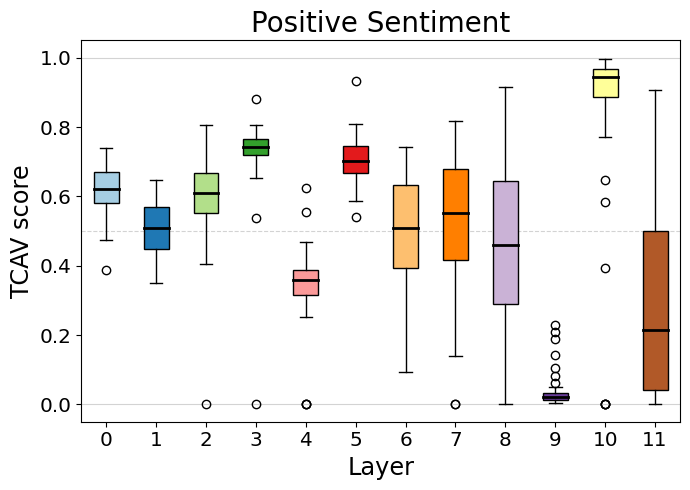

In [161]:
fig1, ax1 = plt.subplots(figsize = (7,5))
plt.tick_params(axis='both', which='major', labelsize='x-large')
plt.axhline(y = 0.5, color = 'lightgrey', linestyle = '--',lw = 0.8)
plt.axhline(y = 0, color = 'lightgrey', linestyle = '-',lw = 0.8)
plt.axhline(y = 1, color = 'lightgrey', linestyle = '-',lw = 0.8)
ax1.set_title('Positive Sentiment', fontsize = 20)
bplot1 = ax1.boxplot(val_pos, patch_artist=True)
ax1.set_ylabel('TCAV score', fontsize = 'xx-large')
ax1.set_xlabel('Layer', fontsize = 'xx-large')
plt.xticks(np.arange(1,13), [0,1,2,3,4,5,6,7,8,9,10,11])
# fill with colors
colors = [sns.color_palette("Paired")[0],sns.color_palette("Paired")[1],sns.color_palette("Paired")[2],sns.color_palette("Paired")[3],sns.color_palette("Paired")[4],
sns.color_palette("Paired")[5],sns.color_palette("Paired")[6],sns.color_palette("Paired")[7],sns.color_palette("Paired")[8],sns.color_palette("Paired")[9],
sns.color_palette("Paired")[10],sns.color_palette("Paired")[11]]

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot1['medians']:
    median.set(color='black', linewidth=2)
plt.tight_layout()
plt.savefig(f'/zhome/94/5/127021/speciale/master_project/src/visualization/figures/tcav_all_bar_pos_sent.pdf',format='pdf',pad_inches=0)

plt.show()

### Negative

In [135]:
layer_nr = [0,1,2,3,4,5,6,7,8,9,10,11] * len(concepts)
df = pd.DataFrame(layer_nr,columns=['layers'])
df['concepts'] = 'none'
df['mean'] = 100
df['std'] = 100

In [136]:
output = neg_spo
for i, fold in enumerate(folders):
    # concept
    df.iloc[(i*12):((i*12)+12),1] = fold
    # mean
    df.iloc[ i*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (i*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (i*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (i*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (i*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (i*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (i*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (i*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (i*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (i*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (i*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (i*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ i*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (i*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (i*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (i*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (i*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (i*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (i*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (i*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (i*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (i*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (i*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (i*12)+11,3] = output[layers[11]]['bn_stds'][i]

In [137]:
j = i 
output = neg_gen
for i, fold in enumerate(['gender','intersex','man','woman']):
    # concept
    ii = i + j + 1
    df.iloc[(ii*12):((ii*12)+12),1] = fold
    # mean
    df.iloc[ ii*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (ii*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (ii*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (ii*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (ii*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (ii*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (ii*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (ii*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (ii*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (ii*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (ii*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (ii*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ ii*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (ii*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (ii*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (ii*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (ii*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (ii*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (ii*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (ii*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (ii*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (ii*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (ii*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (ii*12)+11,3] = output[layers[11]]['bn_stds'][i]
    

In [138]:
j = ii 
output = neg_twe
for i, fold in enumerate(['hate','irony','offensive']):
    # concept
    ii = i + j +1
    df.iloc[(ii*12):((ii*12)+12),1] = fold
    # mean
    df.iloc[ ii*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (ii*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (ii*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (ii*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (ii*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (ii*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (ii*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (ii*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (ii*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (ii*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (ii*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (ii*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ ii*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (ii*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (ii*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (ii*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (ii*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (ii*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (ii*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (ii*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (ii*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (ii*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (ii*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (ii*12)+11,3] = output[layers[11]]['bn_stds'][i]
    

In [139]:
val_neg = df[['layers','concepts','mean']].pivot(index='concepts', columns='layers').values

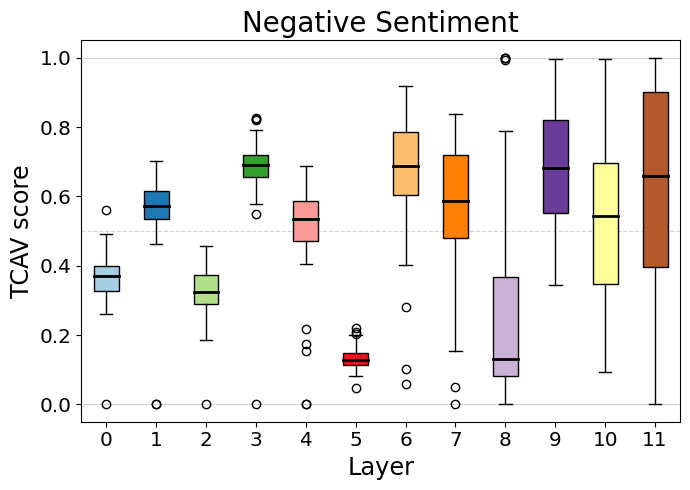

In [162]:
fig1, ax1 = plt.subplots(figsize = (7,5))
plt.tick_params(axis='both', which='major', labelsize='x-large')
plt.axhline(y = 0.5, color = 'lightgrey', linestyle = '--',lw = 0.8)
plt.axhline(y = 0, color = 'lightgrey', linestyle = '-',lw = 0.8)
plt.axhline(y = 1, color = 'lightgrey', linestyle = '-',lw = 0.8)
ax1.set_title('Negative Sentiment', fontsize = 20)
bplot1 = ax1.boxplot(val_neg, patch_artist=True)
ax1.set_ylabel('TCAV score', fontsize = 'xx-large')
ax1.set_xlabel('Layer', fontsize = 'xx-large')
plt.xticks(np.arange(1,13), [0,1,2,3,4,5,6,7,8,9,10,11])

# fill with colors
colors = [sns.color_palette("Paired")[0],sns.color_palette("Paired")[1],sns.color_palette("Paired")[2],sns.color_palette("Paired")[3],sns.color_palette("Paired")[4],
sns.color_palette("Paired")[5],sns.color_palette("Paired")[6],sns.color_palette("Paired")[7],sns.color_palette("Paired")[8],sns.color_palette("Paired")[9],
sns.color_palette("Paired")[10],sns.color_palette("Paired")[11]]

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot1['medians']:
    median.set(color='black', linewidth=2)
plt.tight_layout()
plt.savefig(f'/zhome/94/5/127021/speciale/master_project/src/visualization/figures/tcav_all_bar_neg_sent.pdf',format='pdf',pad_inches=0)
plt.show()